# PyTorch 梯度下降簡易範例

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# 生成隨機的資料
# 最終將用以擬合 y = 2x + 3

torch.manual_seed(42)  # 設定隨機種子
x = torch.rand(100, 1) * 10  # 100 個樣本，範圍 0~10
y = 2 * x + 3 + torch.randn(100, 1) * 2  # 生成隨機的資料

In [ ]:
# 查看資料的維度與長相
print(x.shape)
print(x.size()) # 兩種方式皆可查看資料維度
print()
# print(x)

torch.Size([100, 1])
torch.Size([100, 1])



In [ ]:
# 查看資料的維度與長相
print(y.shape)
print(y.size()) # 兩種方式皆可查看資料維度
print()
# print(x)

torch.Size([100, 1])
torch.Size([100, 1])



In [ ]:
# 設定超參數
learning_rate = 0.01
epochs = 1000  # 訓練 1000 次 (1 個 epoch 的定義為模型看過全部的數據一次)

In [ ]:
# torch.manual_seed(42)  # 設定隨機種子

# 初始化參數 w, b（trainable parameters），通常是隨機初始化
w = torch.randn(1, requires_grad=True)  # w: weight (權重值)
b = torch.randn(1, requires_grad=True)  # b: bias (偏差值)

In [ ]:
def plot_data_with_line(
    x: torch.Tensor,
    y: torch.Tensor,
    w: torch.Tensor,
    b: torch.Tensor,
    title: str,
):
    """ 繪製資料點與擬合的直線 """
    plt.figure(figsize=(6, 4))
    plt.scatter(x.numpy(), y.numpy(), label="Data", alpha=0.6)
    plt.plot(x.numpy(), (w.item() * x.numpy() + b.item()), color="red", label=f"w={w.item():.2f}, b={b.item():.2f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend() # 加入圖說
    plt.title(title) # 加入標題
    plt.show() # 將圖片顯示於此

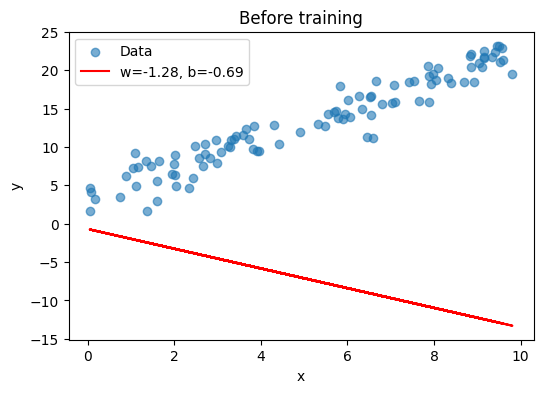

In [ ]:
plot_data_with_line(x, y, w, b, "Before training")

In [ ]:
# 訓練
for epoch in range(epochs):
    y_pred = w * x + b  # `y_pred` 代表預測值
    loss = ((y_pred - y) ** 2).mean()  # Mean squared Error (MSE)

    loss.backward()  # 計算梯度
    with torch.no_grad():  # 禁止 PyTorch 記錄梯度，手動更新參數
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # 清空目前記錄的梯度
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 100 == 0:
        print(
            f"Epoch {epoch}: Loss = {loss.item():.4f},\
              w = {w.item():.4f}, b = {b.item():.4f}"
        )

print(f"Final w: {w.item()}, Final b: {b.item()}")
# 訓練完成後的 w, b 應該接近 2 和 3

Epoch 0: Loss = 515.2518,              w = 1.3912, b = -0.2793
Epoch 100: Loss = 3.8691,              w = 2.2355, b = 1.2397
Epoch 200: Loss = 3.1195,              w = 2.1107, b = 2.0852
Epoch 300: Loss = 2.8319,              w = 2.0335, b = 2.6089
Epoch 400: Loss = 2.7215,              w = 1.9856, b = 2.9333
Epoch 500: Loss = 2.6791,              w = 1.9559, b = 3.1343
Epoch 600: Loss = 2.6629,              w = 1.9376, b = 3.2588
Epoch 700: Loss = 2.6566,              w = 1.9262, b = 3.3359
Epoch 800: Loss = 2.6542,              w = 1.9191, b = 3.3837
Epoch 900: Loss = 2.6533,              w = 1.9148, b = 3.4133
Final w: 1.9120738506317139, Final b: 3.431501626968384


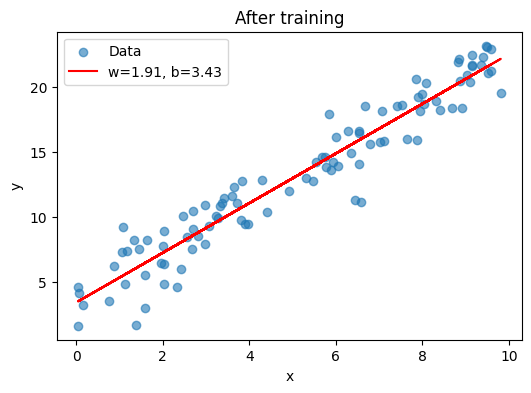

In [ ]:
plot_data_with_line(x, y, w, b, "After training")